# **Codigo Runge-Kutta**

In [9]:
#importamos las librerias
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import e
import cmath
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.cm as cm
import pandas as pd
import numpy as np
from sympy import *
import pandas as pd
import numpy as np
from sympy import symbols, lambdify, exp
import numpy as np
from scipy.optimize import fsolve
from math import e
import warnings
warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 17})

In [2]:
#FLUJO DE ALIMENTACIÓN
#Sal de Oro
F_EAu =2e-7 #M^3/s 1.6667e-7 
CA_E = 0.75 #mM
T_EA = 293.15 #K

#Citrato de Sodio
F_Ecit=2.5e-7 #M^3/s
CB_E= 0.75*2.2 #mM
T_EB=300 #K

#
F_E=F_EAu+F_Ecit

#FLUJO DE SALIDA
F_S=F_E

#Condiciones de la mezcla en el reactor
k0=35.48 #1/s
E= 55000 #J/mol
R=8.314 #J/mol K
Q=-50  #J/s
rho=1000 #kg/m^3
Cp= 4181 #J/KgK
Delta_Hr = -50000.0  # Calor de reacción (J/mol)
J=Delta_Hr/(rho*Cp)

#Condiciones inicales de la mezcla en el reactor CSTR
V0=0.0002#m^3
CA0=0 #mM
CB0=0 #mM
T0=285 #K

#Lapso de tiempo
tc=0
tf=50000
tp=0.01 #tamaño de paso

def f1(t,V,CA,CB,T):
    return F_E-F_S
def f2(t,V,CA,CB,T):
    return ((F_EAu)/V)*(CA_E-CA)-k0*e**(-E/(R*T))*CA*CB**(1.85)
def f3(t,V,CA,CB,T):
    return ((F_Ecit)/V)*(CB_E-CB)-k0*e**(-E/(R*T))*CA*CB**(1.85)
def f4(t,V,CA,CB,T):
    return ((F_EAu)/V)*(T_EA-T)+((F_Ecit)/V)*(T_EB-T)+J*k0*e**(-E/(R*T))*CA*CB**(1.85)-Q/(rho*Cp*V)

def runge_kutta_4th_order(f1,f2,f3,f4, V_0, CA_0,CB_0, T_0, t0, t_final, h):
    num_pasos = int((t_final - t0) / h) + 1
    
    # Inicialización de listas para almacenar los resultados
    t_values = [t0 + i * h for i in range(num_pasos)]
    V_values = [V_0]
    CA_values = [CA_0]
    CB_values = [CB_0]
    T_values=[T_0]
    
    # Método de Runge-Kutta de cuarto orden
    for i in range(1, num_pasos):
        t = t_values[i - 1]
        V = V_values[i - 1]
        CA = CA_values[i - 1]
        CB = CB_values[i - 1]
        T = T_values[i - 1]
        
        k1_y1 = h * f1(t, V, CA, CB, T)
        k1_y2 = h * f2(t, V, CA, CB, T)
        k1_y3 = h * f3(t, V, CA, CB, T)
        k1_y4 = h * f4(t, V, CA, CB, T)
        
        k2_y1 = h * f1(t + h/2, V + k1_y1/2, CA + k1_y2/2, CB + k1_y3/2, T + k1_y4/2)
        k2_y2 = h * f2(t + h/2, V + k1_y1/2, CA + k1_y2/2, CB + k1_y3/2, T + k1_y4/2)
        k2_y3 = h * f3(t + h/2, V + k1_y1/2, CA + k1_y2/2, CB + k1_y3/2, T + k1_y4/2)
        k2_y4 = h * f4(t + h/2, V + k1_y1/2, CA + k1_y2/2, CB + k1_y3/2, T + k1_y4/2)
        
        k3_y1 = h * f1(t + h/2, V + k2_y1/2, CA + k2_y2/2, CB + k2_y3/2, T + k2_y4/2)
        k3_y2 = h * f2(t + h/2, V + k2_y1/2, CA + k2_y2/2, CB + k2_y3/2, T + k2_y4/2)
        k3_y3 = h * f3(t + h/2, V + k2_y1/2, CA + k2_y2/2, CB + k2_y3/2, T + k2_y4/2)
        k3_y4 = h * f4(t + h/2, V + k2_y1/2, CA + k2_y2/2, CB + k2_y3/2, T + k2_y4/2)
        
        k4_y1 = h * f1(t + h, V + k3_y1, CA + k3_y2, CB + k3_y3, T + k3_y4)
        k4_y2 = h * f2(t + h, V + k3_y1, CA + k3_y2, CB + k3_y3, T + k3_y4)
        k4_y3 = h * f3(t + h, V + k3_y1, CA + k3_y2, CB + k3_y3, T + k3_y4)
        k4_y4 = h * f4(t + h, V + k3_y1, CA + k3_y2, CB + k3_y3, T + k3_y4)
        
        V_new = (V + (k1_y1 + 2*k2_y1 + 2*k3_y1 + k4_y1)/6)
        CA_new = CA + (k1_y2 + 2*k2_y2 + 2*k3_y2 + k4_y2)/6
        CB_new = CB + (k1_y3 + 2*k2_y3 + 2*k3_y3 + k4_y3)/6
        T_new = T + (k1_y4 + 2*k2_y4 + 2*k3_y4 + k4_y4)/6
        
        V_values.append(V_new)
        CA_values.append(CA_new)
        CB_values.append(CB_new)
        T_values.append(T_new)
    for i in range(len(V_values)):
        V_values[i] *= 10**6
    return t_values, V_values, CA_values, CB_values, T_values

# Llama a la función de Runge-Kutta y obtén los resultados
t_inicio = tc
t_mayor = tf
tampaso = tp

t_values, V_values, CA_values, CB_values, T_values = runge_kutta_4th_order(f1, f2, f3, f4, V_0=V0, CA_0=CA0, CB_0=CB0, T_0=T0, t0=t_inicio, t_final=t_mayor, h=tampaso)


# *Gráficos Runge-Kutta*

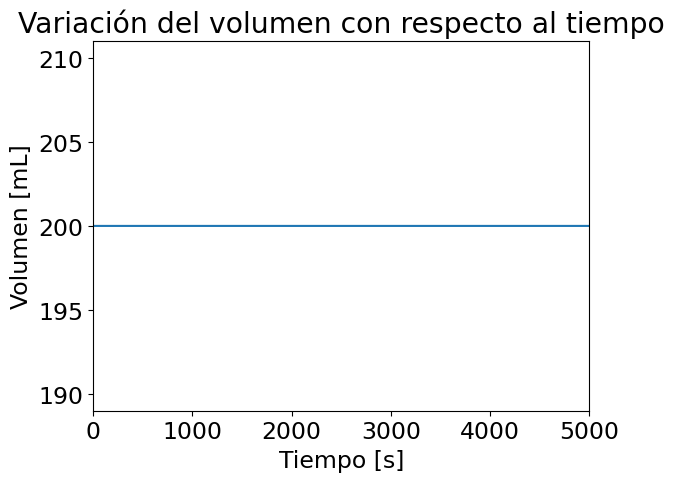

In [3]:
# Grafica: Volumen vs tiempo 
plt.plot(t_values, V_values)
plt.xlabel('Tiempo [s]')
plt.ylabel('Volumen [mL]')
plt.title('Variación del volumen con respecto al tiempo')
plt.xlim(0,5000)
plt.show()

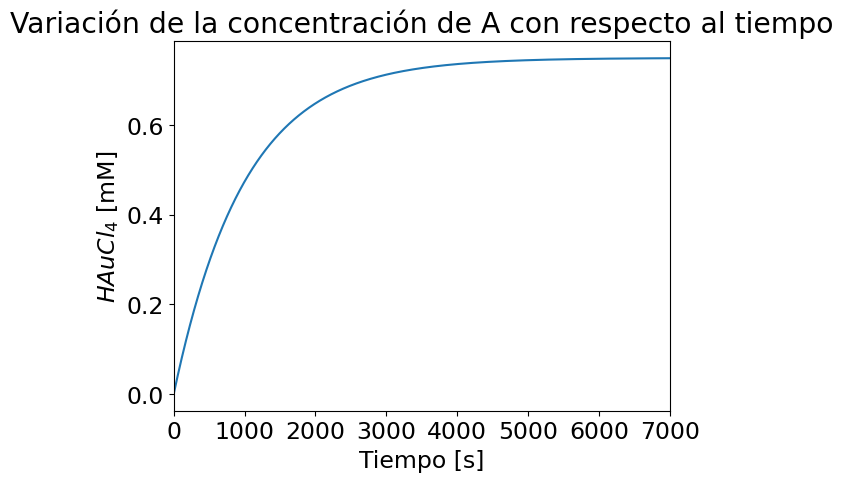

In [4]:
# Grafica: Concentración de A vs tiempo
plt.plot(t_values, CA_values)
plt.xlabel('Tiempo [s]')
plt.ylabel('$HAuCl_4$ [mM]')
plt.title('Variación de la concentración de A con respecto al tiempo')
plt.xlim(0,7000)
plt.show()

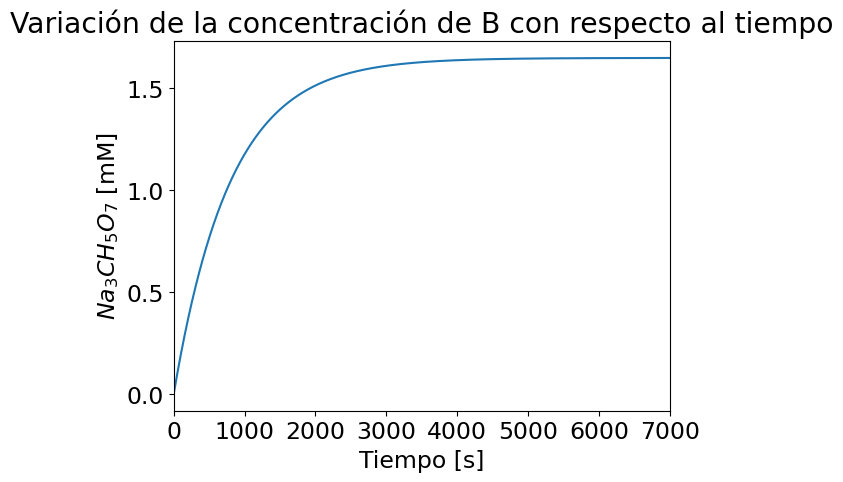

In [5]:
# Grafica: Concentración de A vs tiempo
plt.plot(t_values, CB_values)
plt.xlabel('Tiempo [s]')
plt.ylabel('$Na_3CH_5O_7$ [mM]')
plt.title('Variación de la concentración de B con respecto al tiempo')
plt.xlim(0,7000)
plt.show()

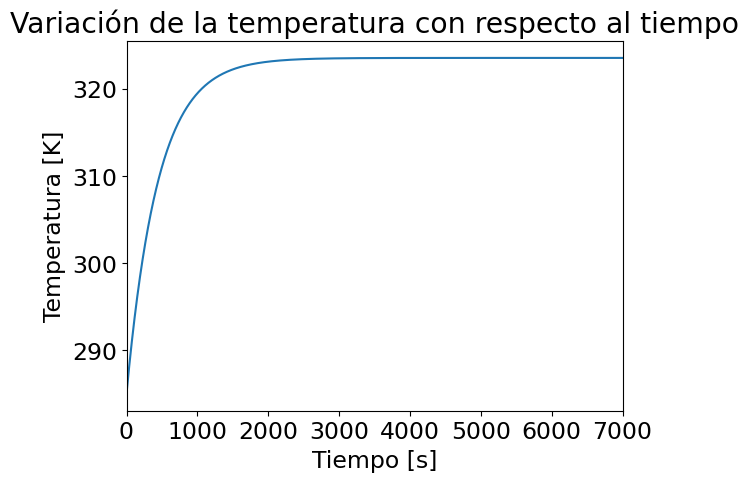

In [6]:
# Grafica: La temperatura vs tiempo
plt.plot(t_values, T_values)
plt.xlabel('Tiempo [s]')
plt.ylabel('Temperatura [K]')
plt.title('Variación de la temperatura con respecto al tiempo')
plt.xlim(0,7000)
plt.show()

# *Determinación de los nodos a diferentes valores de $C_{AE}$, $C_{BE}$, $T_E$, $C_{A0}$, $C_{B0}$ y $T_0$*

In [177]:
#Condiciones de la mezcla en el reactor
V=0.0003 #m^3
k0=35.48 #1/s
E=55000 #J/mol
R=8.314 #J/mol K
rho=1000 #kg/m^3
Cp=4181 #J/kg K
dHr=-50000 #J/mol
cp=4186 #J/g K
J=-dHr /(rho*cp)
Q=0.1 #J/s
#DeltaHr=195 KJ/mol densidad del HAuCl4 3H2O=3.9 g/ml

Condiciones iniciales de la mezcla en el reactor ($C_{A0}$, $C_{B0}$, $T_0$)

In [132]:
import pandas as pd
import numpy as np
from math import e

x=(0,0.25,0.5,1)
y=(0,0.25,0.5,1)
au=[]
cit=[]
temp=[]
      
for i in np.arange(310,350,10):
    for u in y:
        for a in x:
            au.append(u)
            cit.append(a)
            temp.append(i)
rxn={"CA0":au, "CB0":cit, "T0":temp}
VRi=pd.DataFrame(rxn)
VRi

,CA0,CB0,T0
0,0.00,0.00,310
1,0.00,0.25,310
2,0.00,0.50,310
3,0.00,1.00,310
4,0.25,0.00,310
...,...,...,...
59,0.50,1.00,340
60,1.00,0.00,340
61,1.00,0.25,340
62,1.00,0.50,340


Condiciones de los flujos de entrada $C_{AE}$, $C_{BE}$ y $T_E$

In [133]:
Q=[]
FE_A=[]
FE_B=[]
FE=[]
CA_ENTRADA=[]
CB_ENTRADA=[]
TA_ENTRADA=[]
TB_ENTRADA=[]
for q in np.arange(-600,800,200):
    for fA_E in np.arange(1*10**(-7),2*10**(-6),0.5*10**(-6)): #M^3/s
        for fB_E in np.arange(1*10**(-7),2*10**(-6),0.5*10**(-6)):
            for CA_E in np.arange(0.01,1.2,0.2):
                for CB_E in np.arange(0.01,3,0.2):
                    for TA_E in np.arange(310,360,10):
                        for TB_E in np.arange(300,330,10):
                            fE=fA_E+fB_E
                            FE_A.append(fA_E)
                            FE_B.append(fB_E)
                            FE.append(fE)
                            CA_ENTRADA.append(CA_E)
                            CB_ENTRADA.append(CB_E)
                            TA_ENTRADA.append(TA_E)
                            TB_ENTRADA.append(TB_E)
                            Q.append(q)                          
vf_ent={"CA_E":CA_ENTRADA, "CB_E":CB_ENTRADA, "TA_E":TA_ENTRADA,"TB_E":TB_ENTRADA, "FE_A":FE_A, "FE_B":FE_B,"FE":FE,"Q":Q}
VF_E=pd.DataFrame(vf_ent)
VF_E


,CA_E,CB_E,TA_E,TB_E,FE_A,FE_B,FE,Q
0,0.01,0.01,310,300,1.000000e-07,1.000000e-07,2.000000e-07,-600
1,0.01,0.01,310,310,1.000000e-07,1.000000e-07,2.000000e-07,-600
2,0.01,0.01,310,320,1.000000e-07,1.000000e-07,2.000000e-07,-600
3,0.01,0.01,320,300,1.000000e-07,1.000000e-07,2.000000e-07,-600
4,0.01,0.01,320,310,1.000000e-07,1.000000e-07,2.000000e-07,-600
...,...,...,...,...,...,...,...,...
151195,1.01,2.81,340,310,1.600000e-06,1.600000e-06,3.200000e-06,600
151196,1.01,2.81,340,320,1.600000e-06,1.600000e-06,3.200000e-06,600
151197,1.01,2.81,350,300,1.600000e-06,1.600000e-06,3.200000e-06,600
151198,1.01,2.81,350,310,1.600000e-06,1.600000e-06,3.200000e-06,600


In [175]:
# Crear el producto cartesiano de VF_E y VRi
Data_RXN= pd.DataFrame(
    [(row1["CA_E"], row1["CB_E"], row1["TA_E"], row1["TB_E"],row1["FE_A"], row1["FE_B"], row1["FE"], row1["Q"], 
      row2["CA0"], row2["CB0"], row2["T0"]) for _, row1 in VF_E.iterrows() for _, row2 in VRi.iterrows()],
    columns=["CA_E", "CB_E", "TA_E", "TB_E", "FE_A", "FE_B", "FE", "Q", "CA0", "CB0", "T0" ]
)

# Mostrar el DataFrame resultante
Data_RXN


,CA_E,CB_E,TA_E,TB_E,FE_A,FE_B,FE,Q,CA0,CB0,T0
0,0.01,0.01,310.0,300.0,1.000000e-07,1.000000e-07,2.000000e-07,-600.0,0.00,0.00,310.0
1,0.01,0.01,310.0,300.0,1.000000e-07,1.000000e-07,2.000000e-07,-600.0,0.00,0.25,310.0
2,0.01,0.01,310.0,300.0,1.000000e-07,1.000000e-07,2.000000e-07,-600.0,0.00,0.50,310.0
3,0.01,0.01,310.0,300.0,1.000000e-07,1.000000e-07,2.000000e-07,-600.0,0.00,1.00,310.0
4,0.01,0.01,310.0,300.0,1.000000e-07,1.000000e-07,2.000000e-07,-600.0,0.25,0.00,310.0
...,...,...,...,...,...,...,...,...,...,...,...
9676795,1.01,2.81,350.0,320.0,1.600000e-06,1.600000e-06,3.200000e-06,600.0,0.50,1.00,340.0
9676796,1.01,2.81,350.0,320.0,1.600000e-06,1.600000e-06,3.200000e-06,600.0,1.00,0.00,340.0
9676797,1.01,2.81,350.0,320.0,1.600000e-06,1.600000e-06,3.200000e-06,600.0,1.00,0.25,340.0
9676798,1.01,2.81,350.0,320.0,1.600000e-06,1.600000e-06,3.200000e-06,600.0,1.00,0.50,340.0


In [ ]:


def fun(x, i, Data_RXN, V, k0,  E, R, J, rho, Cp):
    return [
        (Data_RXN.iloc[i,4] / V) * (Data_RXN.iloc[i,0] - x[0]) - k0 * e ** (-E / (R * x[2])) * x[0] * x[1]**(1.85),
        (Data_RXN.iloc[i,5] / V) * (Data_RXN.iloc[i,1] - x[1]) - k0 * e ** (-E / (R * x[2])) * x[0] * x[1]**(1.85),
        (Data_RXN.iloc[i,4] / V) * (Data_RXN.iloc[i,2] - x[2]) + (Data_RXN.iloc[i,5] / V) * (Data_RXN.iloc[i,3] - x[2]) + J * k0 * e ** (-E / (R * x[2])) * x[0] * x[1]**(1.85) + Data_RXN.iloc[i,7] / (rho * Cp * V)
    ]

RESULTADOS = []

for i in np.arange(0, len(Data_RXN), 20):
    # Estimación inicial para fsolve
    x0 = [Data_RXN.iloc[i,8], Data_RXN.iloc[i,9], Data_RXN.iloc[i,10]]
    
    # Llamar a fsolve pasando los parámetros adicionales
    sol = fsolve(fun, x0, args=(i, Data_RXN, V, k0, E, R, J, rho, Cp))
    
    RESULTADOS.append(sol)

# Convertir a array numpy para mejor manipulación
RESULTADOS = np.array(RESULTADOS)

In [179]:
CA=[]
CB=[]
T=[]
for i in np.arange(0, len(RESULTADOS),1):
    CA.append(RESULTADOS[i][0])
    CB.append(RESULTADOS[i][1])
    T.append(RESULTADOS[i][2])

In [180]:
edo_est=[CA,CB,T]
EDO_EST=pd.DataFrame(edo_est).T
EDO_EST.columns=["CA","CB","T"]

Data_RXN = Data_RXN[Data_RXN.index.isin(range(0, len(Data_RXN), 20))]
Data_RXN.reset_index(drop=True, inplace=True)
# Concatenar los DataFrames
df_concatenado = pd.concat([Data_RXN, EDO_EST], axis=1)

In [181]:
EDO_EST

,CA,CB,T
0,0.000000,0.000000,310.000000
1,0.250000,0.000000,320.000000
2,0.500000,0.000000,330.000000
3,1.000000,0.000000,340.000000
4,0.000000,0.000000,320.000000
...,...,...,...
483835,1.009018,2.809018,374.845737
483836,1.009018,2.809018,374.845737
483837,1.008761,2.808761,379.845738
483838,1.008761,2.808761,379.845738


In [186]:
df_concatenado

,CA_E,CB_E,TA_E,TB_E,FE_A,FE_B,FE,Q,CA0,CB0,T0,CA,CB,T
0,0.01,0.01,310.0,300.0,1.000000e-07,1.000000e-07,2.000000e-07,-600.0,0.00,0.0,310.0,0.000000,0.000000,310.000000
1,0.01,0.01,310.0,300.0,1.000000e-07,1.000000e-07,2.000000e-07,-600.0,0.25,0.0,320.0,0.250000,0.000000,320.000000
2,0.01,0.01,310.0,300.0,1.000000e-07,1.000000e-07,2.000000e-07,-600.0,0.50,0.0,330.0,0.500000,0.000000,330.000000
3,0.01,0.01,310.0,300.0,1.000000e-07,1.000000e-07,2.000000e-07,-600.0,1.00,0.0,340.0,1.000000,0.000000,340.000000
4,0.01,0.01,310.0,310.0,1.000000e-07,1.000000e-07,2.000000e-07,-600.0,0.00,0.0,320.0,0.000000,0.000000,320.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483835,1.01,2.81,350.0,310.0,1.600000e-06,1.600000e-06,3.200000e-06,600.0,1.00,0.0,320.0,1.009018,2.809018,374.845737
483836,1.01,2.81,350.0,310.0,1.600000e-06,1.600000e-06,3.200000e-06,600.0,0.00,0.0,340.0,1.009018,2.809018,374.845737
483837,1.01,2.81,350.0,320.0,1.600000e-06,1.600000e-06,3.200000e-06,600.0,0.25,0.0,310.0,1.008761,2.808761,379.845738
483838,1.01,2.81,350.0,320.0,1.600000e-06,1.600000e-06,3.200000e-06,600.0,0.50,0.0,320.0,1.008761,2.808761,379.845738


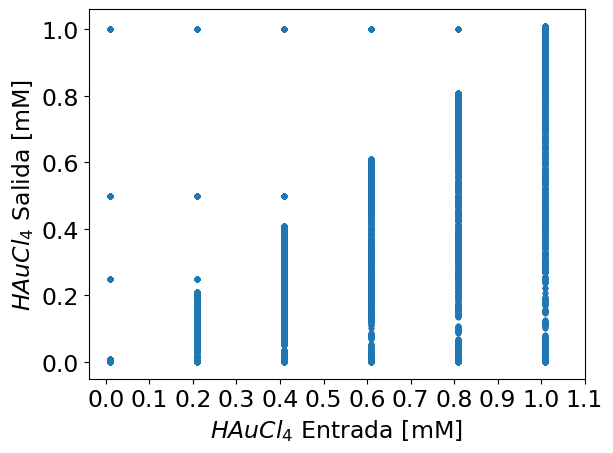

In [ ]:
plt.scatter(df_concatenado["CA_E"],df_concatenado["CA"],marker=".",s=37)
plt.xlabel('$HAuCl_4$ Entrada [mM]',)
plt.ylabel('$HAuCl_4$ Salida [mM]',)
plt.xticks(np.arange(0,1.2,0.1), rotation=0)
plt.yticks( rotation=0)
plt.show()

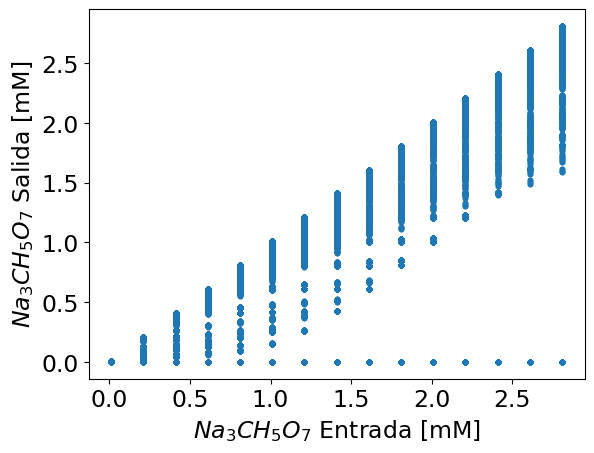

In [ ]:
plt.scatter(df_concatenado["CB_E"],df_concatenado["CB"],marker=".",s=37)
plt.xlabel('$Na_3CH_5O_7$ Entrada [mM]', )
plt.ylabel('$Na_3CH_5O_7$ Salida [mM]', )
plt.show()

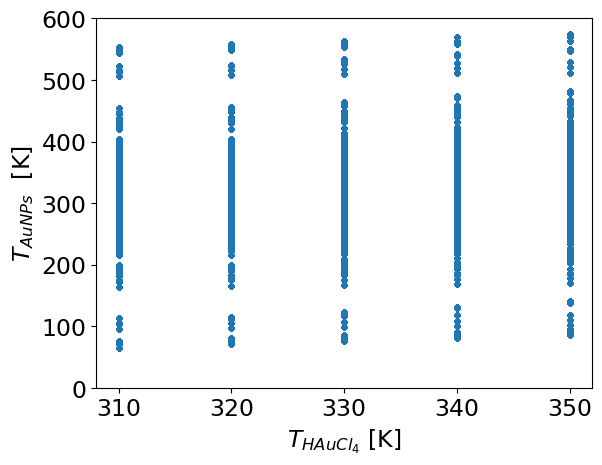

In [ ]:
plt.scatter(df_concatenado["TA_E"],df_concatenado["T"],marker=".",s=37)
plt.xlabel('$T_{HAuCl_4}$ [K]',)
plt.ylabel('$T_{AuNPs}$  [K]',)
plt.xticks(  rotation=0)
plt.yticks(  rotation=0)
plt.ylim(0,600)

plt.show()

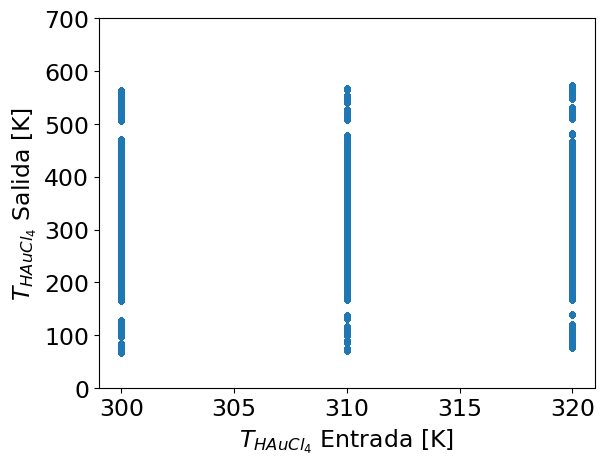

In [ ]:
plt.scatter(df_concatenado["TB_E"],df_concatenado["T"],marker=".",s=37)
plt.xlabel('$T_{HAuCl_4}$ Entrada [K]',)
plt.ylabel('$T_{HAuCl_4}$ Salida [K]',)
plt.xticks(  rotation=0)
plt.yticks(  rotation=0)
plt.ylim(0,700)
plt.show()

In [ ]:
#Condiciones de la mezcla en el reactor
V=0.0003 #m^3
k0=35.48 #1/s
E=55000 #J/mol
R=8.314 #J/mol K
rho=1000 #kg/m^3
Cp=4181 #J/kg K
dHr=-50000 #J/mol
cp=4186 #J/g K
J=-dHr /(rho*cp)
Q=0.1 #J/s


In [191]:
# Definir símbolos correctamente
FAu, Vol, CAE, C1, k0_sym, E_sym, R_sym, TA = symbols("F_Au V C_AE C_1 k_0 E R T_AE")
FCit, CBE, C2, TB = symbols("F_Cit C_BE C_2 T_BE")
T, J_sym, Q_sym, rho_sym, Cp_sym, lam = symbols("T J Q rho Cp lambda")

# Ecuaciones corregidas con C1*C2**(1.85)
dCAdt = FAu/Vol * (CAE - C1) - k0_sym * exp(-E_sym/(R_sym*T)) * C1 * C2**1.85
dCBdt = FCit/Vol * (CBE - C2) - k0_sym * exp(-E_sym/(R_sym*T)) * C1 * C2**1.85
dTdt = FAu/Vol * (TA - T) + FCit/Vol * (TB - T) + J_sym * k0_sym * exp(-E_sym/(R_sym*T)) * C1 * C2**1.85 + Q_sym/(rho_sym * Cp_sym * Vol)

# Derivadas de CA
dCA1 = diff(dCAdt, C1)  # d(dCAdt)/dC1
dCA2 = diff(dCAdt, C2)  # d(dCAdt)/dC2
dCA3 = diff(dCAdt, T)   # d(dCAdt)/dT

# Simplificar las expresiones antes de convertir a numérico
dCA1_simp = dCA1.simplify()
dCA2_simp = dCA2.simplify()
dCA3_simp = dCA3.simplify()

# Funciones lambdify mejoradas
dCA1_num = lambdify((FAu, Vol, k0_sym, E_sym, T, R_sym, C2), dCA1_simp, modules=['numpy'])
dCA2_num = lambdify((C1, k0_sym, E_sym, T, R_sym, C2), dCA2_simp, modules=['numpy'])
dCA3_num = lambdify((C1, C2, k0_sym, E_sym, T, R_sym), dCA3_simp, modules=['numpy'])

#Derivadas de CB
dCB1=diff(dCBdt,C1)
dCB2=diff(dCBdt,C2)
dCB3=diff(dCBdt,T)

dCB1_simp = dCB1.simplify()
dCB2_simp = dCB2.simplify()
dCB3_simp = dCB3.simplify()

dCB1_num = lambdify((C2, k0_sym, E_sym, T, R_sym), dCB1_simp, modules=['numpy'])
dCB2_num = lambdify((FCit, Vol, C1, k0_sym, E_sym, T, R_sym, C2), dCB2_simp, modules=['numpy'])
dCB3_num = lambdify((C1, C2, k0_sym, E_sym, T, R_sym), dCB3_simp, modules=['numpy'])

#Derivadas de t
dT1=diff(dTdt,C1)
dT2=diff(dTdt,C2)
dT3=diff(dTdt,T)

dT1_simp = dT1.simplify()
dT2_simp = dT2.simplify()
dT3_simp = dT3.simplify()

dT1_num = lambdify((J_sym, k0_sym, E_sym, T, R_sym, C2), dT1_simp, modules=['numpy'])
dT2_num = lambdify((J_sym, C1, k0_sym, E_sym, T, R_sym, C2), dT2_simp, modules=['numpy'])
dT3_num = lambdify((FAu, FCit, Vol, C1, C2, k0_sym, E_sym, T, R_sym, J_sym), dT3_simp, modules=['numpy'])


In [ ]:


# --- Definir símbolos ---
FAu,Fcit, Vol, C1, C2, k0_sym, E_sym, R_sym, T_sym = symbols("FAu Fcit V C1 C2 k0 E R T ")
J_sym = symbols("J")

# --- Parámetros ---
V = 0.0003      # m^3
k0 = 35.48      # 1/s
E = 55000       # J/mol
R = 8.314       # J/mol K
rho = 1000      # kg/m^3
Cp = 4181       # J/kg K
dHr = -50000    # J/mol
cp = 4186       # J/g K
J = -dHr/(rho*cp)

# --- Definir expresiones simbólicas simplificadas ---
dCA1_simp = -FAu/Vol - k0_sym*C2**1.85*exp(-E_sym/(R_sym*T_sym))
dCA2_simp = -1.85*k0_sym*C1*C2**0.85*exp(-E_sym/(R_sym*T_sym))
dCA3_simp = -k0_sym*C1*C2**1.85*exp(-E_sym/(R_sym*T_sym)) * E_sym/(R_sym*T_sym**2)

dCB1_simp = -k0_sym*C2**1.85*exp(-E_sym/(R_sym*T_sym))
dCB2_simp = -FAu/Vol - 1.85*k0_sym*C1*C2**0.85*exp(-E_sym/(R_sym*T_sym))
dCB3_simp = -k0_sym*C1*C2**1.85*exp(-E_sym/(R_sym*T_sym)) * E_sym/(R_sym*T_sym**2)

dT1_simp = J_sym * k0_sym * C2**1.85 * exp(-E_sym/(R_sym*T_sym))
dT2_simp = 1.85 * J_sym * k0_sym * C1 * C2**0.85 * exp(-E_sym/(R_sym*T_sym))
dT3_simp = -FAu/Vol - FAu/Vol + J_sym * k0_sym * C1 * C2**1.85 * exp(-E_sym/(R_sym*T_sym)) * E_sym/(R_sym*T_sym**2)

# --- Lambdify ---
dCA1_num = lambdify((FAu, Vol, k0_sym, E_sym, R_sym, C2, T_sym), dCA1_simp, "numpy")
dCA2_num = lambdify((C1, k0_sym, E_sym, R_sym, C2, T_sym), dCA2_simp, "numpy")
dCA3_num = lambdify((C1, C2, k0_sym, E_sym, R_sym, T_sym), dCA3_simp, "numpy")

dCB1_num = lambdify((C2, k0_sym, E_sym, R_sym, T_sym), dCB1_simp, "numpy")
dCB2_num = lambdify((C1, FAu, Vol, k0_sym, E_sym, R_sym, C2, T_sym), dCB2_simp, "numpy")
dCB3_num = lambdify((C1, C2, k0_sym, E_sym, R_sym, T_sym), dCB3_simp, "numpy")

dT1_num = lambdify((J_sym, k0_sym, C2, E_sym, R_sym, T_sym), dT1_simp, "numpy")
dT2_num = lambdify((J_sym, k0_sym, C1, C2, E_sym, R_sym, T_sym), dT2_simp, "numpy")
dT3_num = lambdify((FAu, Fcit, Vol, J_sym, k0_sym, C1, C2, E_sym, R_sym, T_sym), dT3_simp, "numpy")

# --- Evaluar fila por fila ---
results = []
for idx, row in df_concatenado.iterrows():
    C1_val = row['CA']
    C2_val = row['CB']
    T_val = row['T']
    FAu_val = row['FE_A']
    FCit_val = row['FE_B'] 

    # Manejo caso T=0
    if T_val == 0:
        exp_factor = 0
        E_RT2_factor = 0
    else:
        exp_factor = np.exp(-E/(R*T_val))
        E_RT2_factor = E/(R*T_val**2) * exp_factor

    # Calcular derivadas
    dCA1_val = -FAu_val/V - k0*C2_val**1.85*exp_factor
    dCA2_val = -1.85*k0*C1_val*C2_val**0.85*exp_factor
    dCA3_val = -k0*C1_val*C2_val**1.85*E_RT2_factor

    dCB1_val = -k0*C2_val**1.85*exp_factor
    dCB2_val = -FCit_val/V - 1.85*k0*C1_val*C2_val**0.85*exp_factor
    dCB3_val = -k0*C1_val*C2_val**1.85*E_RT2_factor

    dT1_val = J*k0*C2_val**1.85*exp_factor
    dT2_val = 1.85*J*k0*C1_val*C2_val**0.85*exp_factor
    dT3_val = -FAu_val/V - FCit_val/V + J*k0*C1_val*C2_val**1.85*E_RT2_factor 
    results.append([dCA1_val, dCA2_val, dCA3_val,
                    dCB1_val, dCB2_val, dCB3_val,
                    dT1_val, dT2_val, dT3_val])

# --- Crear nuevo DataFrame ---
df_derivadas = pd.DataFrame(results, columns=[
    'dCA1', 'dCA2', 'dCA3',
    'dCB1', 'dCB2', 'dCB3',
    'dT1', 'dT2', 'dT3'
])

# Unir con df original si quieres
df_final = pd.concat([df_concatenado.reset_index(drop=True), df_derivadas], axis=1)


In [193]:
df_final 

,CA_E,CB_E,TA_E,TB_E,FE_A,FE_B,FE,Q,CA0,CB0,...,T,dCA1,dCA2,dCA3,dCB1,dCB2,dCB3,dT1,dT2,dT3
0,0.01,0.01,310.0,300.0,1.000000e-07,1.000000e-07,2.000000e-07,-600.0,0.00,0.0,...,310.000000,-0.000333,-0.000000,-0.000000e+00,-0.000000,-0.000333,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000667
1,0.01,0.01,310.0,300.0,1.000000e-07,1.000000e-07,2.000000e-07,-600.0,0.25,0.0,...,320.000000,-0.000333,-0.000000,-0.000000e+00,-0.000000,-0.000333,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000667
2,0.01,0.01,310.0,300.0,1.000000e-07,1.000000e-07,2.000000e-07,-600.0,0.50,0.0,...,330.000000,-0.000333,-0.000000,-0.000000e+00,-0.000000,-0.000333,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000667
3,0.01,0.01,310.0,300.0,1.000000e-07,1.000000e-07,2.000000e-07,-600.0,1.00,0.0,...,340.000000,-0.000333,-0.000000,-0.000000e+00,-0.000000,-0.000333,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000667
4,0.01,0.01,310.0,310.0,1.000000e-07,1.000000e-07,2.000000e-07,-600.0,0.00,0.0,...,320.000000,-0.000333,-0.000000,-0.000000e+00,-0.000000,-0.000333,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483835,1.01,2.81,350.0,310.0,1.600000e-06,1.600000e-06,3.200000e-06,600.0,1.00,0.0,...,374.845737,-0.005339,-0.000003,-2.466298e-07,-0.000005,-0.005337,-2.466298e-07,6.201118e-08,4.120843e-08,-0.010667
483836,1.01,2.81,350.0,310.0,1.600000e-06,1.600000e-06,3.200000e-06,600.0,0.00,0.0,...,374.845737,-0.005339,-0.000003,-2.466298e-07,-0.000005,-0.005337,-2.466298e-07,6.201118e-08,4.120843e-08,-0.010667
483837,1.01,2.81,350.0,320.0,1.600000e-06,1.600000e-06,3.200000e-06,600.0,0.25,0.0,...,379.845738,-0.005340,-0.000004,-3.028603e-07,-0.000007,-0.005338,-3.028603e-07,7.821436e-08,5.196751e-08,-0.010667
483838,1.01,2.81,350.0,320.0,1.600000e-06,1.600000e-06,3.200000e-06,600.0,0.50,0.0,...,379.845738,-0.005340,-0.000004,-3.028603e-07,-0.000007,-0.005338,-3.028603e-07,7.821436e-08,5.196751e-08,-0.010667


In [ ]:

# Suponiendo que ya tienes df_derivadas con las 9 columnas de derivadas
# Si no, puedes crearlo así:
df_derivadas = pd.DataFrame(results, columns=[
    'dCA1', 'dCA2', 'dCA3',
    'dCB1', 'dCB2', 'dCB3', 
    'dT1', 'dT2', 'dT3'
])

# Listas para almacenar resultados
jacobian_matrices = []
eigenvalues_list = []
determinants_list = []
stability_list = []

print("Calculando matrices Jacobianas y eigenvalores...")

for idx, row in df_derivadas.iterrows():
    try:
        # Construir matriz Jacobiana 3x3 a partir de las derivadas
        # La matriz Jacobiana tiene la forma:
        # J = [[dCA1/dC1, dCA2/dC2, dCA3/dT],
        #      [dCB1/dC1, dCB2/dC2, dCB3/dT],
        #      [dT1/dC1,  dT2/dC2,  dT3/dT]]
        
        J = np.array([
            [row['dCA1'], row['dCA2'], row['dCA3']],
            [row['dCB1'], row['dCB2'], row['dCB3']],
            [row['dT1'],  row['dT2'],  row['dT3']]
        ], dtype=complex)  # Usar complex para manejar eigenvalores complejos
        
        # Almacenar matriz Jacobiana
        jacobian_matrices.append(J)
        
        # Calcular eigenvalores (resuelve det(J - λI) = 0)
        eigenvalues = np.linalg.eigvals(J)
        
        # Ordenar eigenvalores por parte real (de mayor a menor)
        eigenvalues_sorted = sorted(eigenvalues, key=lambda x: x.real, reverse=True)
        eigenvalues_list.append(eigenvalues_sorted)
        
        # Calcular determinantes de J - λI para cada eigenvalor (deberían ser ~0)
        I = np.eye(3, dtype=complex)  # Matriz identidad
        determinants = []
        for λ in eigenvalues_sorted:
            det_value = np.linalg.det(J - λ * I)
            determinants.append(det_value)
        
        determinants_list.append(determinants)
        
        # Determinar estabilidad
        max_real_part = max(λ.real for λ in eigenvalues_sorted)
        if max_real_part > 0:
            stability = "Inestable"
        elif max_real_part < 0:
            stability = "Estable"
        else:
            stability = "Marginalmente estable"
        stability_list.append(stability)
        
    except Exception as e:
        # En caso de error, asignar valores por defecto
        jacobian_matrices.append(np.full((3, 3), np.nan))
        eigenvalues_list.append([np.nan, np.nan, np.nan])
        determinants_list.append([np.nan, np.nan, np.nan])
        stability_list.append("Error")

# Convertir a arrays para mejor manipulación
eigenvalues_arr = np.array(eigenvalues_list)
determinants_arr = np.array(determinants_list)

# Crear DataFrame con resultados
results_df = pd.DataFrame({
    'jacobian_matrix': jacobian_matrices,
    'eigenvalue_1': eigenvalues_arr[:, 0],
    'eigenvalue_2': eigenvalues_arr[:, 1], 
    'eigenvalue_3': eigenvalues_arr[:, 2],
    'det_1': determinants_arr[:, 0],
    'det_2': determinants_arr[:, 1],
    'det_3': determinants_arr[:, 2],
    'stability': stability_list
})

# Agregar información de los eigenvalores separada en partes real e imaginaria
results_df['eigenvalue_1_real'] = eigenvalues_arr[:, 0].real
results_df['eigenvalue_1_imag'] = eigenvalues_arr[:, 0].imag
results_df['eigenvalue_2_real'] = eigenvalues_arr[:, 1].real  
results_df['eigenvalue_2_imag'] = eigenvalues_arr[:, 1].imag
results_df['eigenvalue_3_real'] = eigenvalues_arr[:, 2].real
results_df['eigenvalue_3_imag'] = eigenvalues_arr[:, 2].imag

# Agregar las variables originales para referencia
results_df['CA'] = df_concatenado['CA'].values
results_df['CB'] = df_concatenado['CB'].values
results_df['T'] = df_concatenado['T'].values
results_df['FAu'] = df_concatenado['FE_A'].values
results_df['FCit'] = df_concatenado['FE_B'].values

# FUNCIÓN PARA MOSTRAR ANÁLISIS DETALLADO
def analyze_jacobian(index):
    """Muestra análisis detallado de una matriz Jacobiana específica"""
    if index >= len(results_df):
        print(f"Índice {index} fuera de rango")
        return
    
    print(f"\n=== ANÁLISIS DE MATRIZ JACOBIANA - FILA {index} ===")
    print(f"Condiciones: CA={results_df.iloc[index]['CA']:.4f}, CB={results_df.iloc[index]['CB']:.4f}, T={results_df.iloc[index]['T']:.2f}K")
    
    J = results_df.iloc[index]['jacobian_matrix']
    print("\nMatriz Jacobiana:")
    print(J)
    
    print("\nEigenvalores:")
    for i in range(3):
        λ_real = results_df.iloc[index][f'eigenvalue_{i+1}_real']
        λ_imag = results_df.iloc[index][f'eigenvalue_{i+1}_imag']
        print(f"λ{i+1} = {λ_real:.6f} + {λ_imag:.6f}i")
    
    print(f"\nEstabilidad: {results_df.iloc[index]['stability']}")
    
    # Verificar que det(J - λI) ≈ 0
    I = np.eye(3)
    print("\nVerificación (det(J - λI) debería ser ≈ 0):")
    for i in range(3):
        λ = eigenvalues_arr[index, i]
        det_value = np.linalg.det(J - λ * I)
        print(f"det(J - λ{i+1}I) = {det_value:.2e}")

# ESTADÍSTICAS GENERALES
print("\n=== ESTADÍSTICAS DE EIGENVALORES ===")

def print_eigenvalue_stats(eigenvalues, name):
    real_parts = eigenvalues.real
    imag_parts = eigenvalues.imag
    
    print(f"{name}:")
    print(f"  Parte Real: Min={np.nanmin(real_parts):.6f}, Max={np.nanmax(real_parts):.6f}")
    print(f"  Parte Imag: Min={np.nanmin(imag_parts):.6f}, Max={np.nanmax(imag_parts):.6f}")
    print(f"  Reales: {np.sum(imag_parts == 0):,} | Complejos: {np.sum(imag_parts != 0):,}")

print_eigenvalue_stats(eigenvalues_arr[:, 0], "Eigenvalor 1")
print_eigenvalue_stats(eigenvalues_arr[:, 1], "Eigenvalor 2") 
print_eigenvalue_stats(eigenvalues_arr[:, 2], "Eigenvalor 3")

# ANÁLISIS DE ESTABILIDAD
print(f"\n=== ANÁLISIS DE ESTABILIDAD ===")
stability_counts = results_df['stability'].value_counts()
for stability, count in stability_counts.items():
    percentage = count / len(results_df) * 100
    print(f"{stability}: {count:,} puntos ({percentage:.1f}%)")

# ENCONTRAR PUNTOS CRÍTICOS (eigenvalor dominante)
print(f"\n=== PUNTOS CRÍTICOS ===")

# Eigenvalor con mayor parte real para cada punto
dominant_eigenvalues = []
for i in range(len(results_df)):
    eigenvalues = eigenvalues_arr[i]
    if not np.any(np.isnan(eigenvalues)):
        dominant_idx = np.argmax([λ.real for λ in eigenvalues])
        dominant_eigenvalues.append(eigenvalues[dominant_idx])
    else:
        dominant_eigenvalues.append(np.nan)

results_df['eigenvalue_dominante'] = dominant_eigenvalues
results_df['eigenvalue_dominante_real'] = [λ.real if not np.isnan(λ) else np.nan for λ in dominant_eigenvalues]

# Puntos inestables (algún eigenvalor con parte real > 0)
unstable_points = results_df[results_df['stability'] == 'Inestable']
print(f"Puntos inestables encontrados: {len(unstable_points)}")

if len(unstable_points) > 0:
    print("\nMuestra de puntos inestables:")
    print(unstable_points[['CA', 'CB', 'T', 'eigenvalue_dominante_real']].head())

# VISUALIZACIÓN DE RESULTADOS
print(f"\n=== EJEMPLOS DE ANÁLISIS ===")
# Mostrar análisis de algunas filas representativas
sample_indices = [0, len(results_df)//4, len(results_df)//2, len(results_df)-1]
for idx in sample_indices:
    if idx < len(results_df):
        analyze_jacobian(idx)

# GUARDAR RESULTADOS
output_file = 'analisis_jacobiano_completo.csv'

# Crear versión simplificada para CSV (las matrices no se guardan bien en CSV)
csv_results = results_df.drop('jacobian_matrix', axis=1)
csv_results.to_csv(output_file, index=False)
print(f"\nResultados guardados en: {output_file}")

# RESUMEN FINAL
print(f"\n=== RESUMEN FINAL ===")
print(f"Total de puntos analizados: {len(results_df):,}")
print(f"Puntos estables: {stability_counts.get('Estable', 0):,}")
print(f"Puntos inestables: {stability_counts.get('Inestable', 0):,}")
print(f"Puntos marginalmente estables: {stability_counts.get('Marginalmente estable', 0):,}")

# Eigenvalor dominante promedio
dominant_real_mean = results_df['eigenvalue_dominante_real'].mean()
print(f"Parte real promedio del eigenvalor dominante: {dominant_real_mean:.6f}")

print("\n¡Análisis completado exitosamente!")

Calculando matrices Jacobianas y eigenvalores...

=== ESTADÍSTICAS DE EIGENVALORES ===
Eigenvalor 1:
  Parte Real: Min=-0.005333, Max=-0.000333
  Parte Imag: Min=-0.000000, Max=0.000000
  Reales: 483,638 | Complejos: 202
Eigenvalor 2:
  Parte Real: Min=-0.005388, Max=-0.000333
  Parte Imag: Min=-0.000005, Max=0.000005
  Reales: 483,628 | Complejos: 212
Eigenvalor 3:
  Parte Real: Min=-0.444568, Max=-0.000666
  Parte Imag: Min=-0.000005, Max=0.000005
  Reales: 483,628 | Complejos: 212

=== ANÁLISIS DE ESTABILIDAD ===
Estable: 483,840 puntos (100.0%)

=== PUNTOS CRÍTICOS ===
Puntos inestables encontrados: 0

=== EJEMPLOS DE ANÁLISIS ===

=== ANÁLISIS DE MATRIZ JACOBIANA - FILA 0 ===
Condiciones: CA=0.0000, CB=0.0000, T=310.00K

Matriz Jacobiana:
[[-0.00033333+0.j -0.        +0.j -0.        +0.j]
 [-0.        +0.j -0.00033333+0.j -0.        +0.j]
 [ 0.        +0.j  0.        +0.j -0.00066667+0.j]]

Eigenvalores:
λ1 = -0.000333 + 0.000000i
λ2 = -0.000333 + 0.000000i
λ3 = -0.000667 + 0.0000

In [195]:
results_df

,jacobian_matrix,eigenvalue_1,eigenvalue_2,eigenvalue_3,det_1,det_2,det_3,stability,eigenvalue_1_real,eigenvalue_1_imag,...,eigenvalue_2_imag,eigenvalue_3_real,eigenvalue_3_imag,CA,CB,T,FAu,FCit,eigenvalue_dominante,eigenvalue_dominante_real
0,"[[(-0.0003333333333333333+0j), (-0+0j), (-0+0j...",-0.000333+0.000000j,-0.000333+0.000000j,-0.000667+0.000000j,0.000000e+00+0.000000e+00j,0.000000e+00+0.000000e+00j,0.000000e+00+0.000000e+00j,Estable,-0.000333,0.0,...,0.0,-0.000667,0.0,0.000000,0.000000,310.000000,1.000000e-07,1.000000e-07,-0.000333+0.000000j,-0.000333
1,"[[(-0.0003333333333333333+0j), (-0+0j), (-0+0j...",-0.000333+0.000000j,-0.000333+0.000000j,-0.000667+0.000000j,0.000000e+00+0.000000e+00j,0.000000e+00+0.000000e+00j,0.000000e+00+0.000000e+00j,Estable,-0.000333,0.0,...,0.0,-0.000667,0.0,0.250000,0.000000,320.000000,1.000000e-07,1.000000e-07,-0.000333+0.000000j,-0.000333
2,"[[(-0.0003333333333333333+0j), (-0+0j), (-0+0j...",-0.000333+0.000000j,-0.000333+0.000000j,-0.000667+0.000000j,0.000000e+00+0.000000e+00j,0.000000e+00+0.000000e+00j,0.000000e+00+0.000000e+00j,Estable,-0.000333,0.0,...,0.0,-0.000667,0.0,0.500000,0.000000,330.000000,1.000000e-07,1.000000e-07,-0.000333+0.000000j,-0.000333
3,"[[(-0.0003333333333333333+0j), (-0+0j), (-0+0j...",-0.000333+0.000000j,-0.000333+0.000000j,-0.000667+0.000000j,0.000000e+00+0.000000e+00j,0.000000e+00+0.000000e+00j,0.000000e+00+0.000000e+00j,Estable,-0.000333,0.0,...,0.0,-0.000667,0.0,1.000000,0.000000,340.000000,1.000000e-07,1.000000e-07,-0.000333+0.000000j,-0.000333
4,"[[(-0.0003333333333333333+0j), (-0+0j), (-0+0j...",-0.000333+0.000000j,-0.000333+0.000000j,-0.000667+0.000000j,0.000000e+00+0.000000e+00j,0.000000e+00+0.000000e+00j,0.000000e+00+0.000000e+00j,Estable,-0.000333,0.0,...,0.0,-0.000667,0.0,0.000000,0.000000,320.000000,1.000000e-07,1.000000e-07,-0.000333+0.000000j,-0.000333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483835,"[[(-0.005338524909698821+0j), (-3.449969946560...",-0.005333+0.000000j,-0.005342+0.000000j,-0.010667+0.000000j,-1.253680e-25+0.000000e+00j,5.238850e-26+0.000000e+00j,1.105224e-23+0.000000e+00j,Estable,-0.005333,0.0,...,0.0,-0.010667,0.0,1.009018,2.809018,374.845737,1.600000e-06,1.600000e-06,-0.005333+0.000000j,-0.005333
483836,"[[(-0.005338524909698821+0j), (-3.449969946560...",-0.005333+0.000000j,-0.005342+0.000000j,-0.010667+0.000000j,-1.256494e-25+0.000000e+00j,1.319174e-25+0.000000e+00j,1.105224e-23+0.000000e+00j,Estable,-0.005333,0.0,...,0.0,-0.010667,0.0,1.009018,2.809018,374.845737,1.600000e-06,1.600000e-06,-0.005333+0.000000j,-0.005333
483837,"[[(-0.005339881439811362+0j), (-4.350719546321...",-0.005333+0.000000j,-0.005344+0.000000j,-0.010667+0.000000j,1.038889e-25+0.000000e+00j,-9.936047e-26+0.000000e+00j,-5.011279e-23+0.000000e+00j,Estable,-0.005333,0.0,...,0.0,-0.010667,0.0,1.008761,2.808761,379.845738,1.600000e-06,1.600000e-06,-0.005333+0.000000j,-0.005333
483838,"[[(-0.005339881439811362+0j), (-4.350719546321...",-0.005333+0.000000j,-0.005344+0.000000j,-0.010667+0.000000j,1.060779e-25+0.000000e+00j,-9.717594e-26+0.000000e+00j,-5.011278e-23+0.000000e+00j,Estable,-0.005333,0.0,...,0.0,-0.010667,0.0,1.008761,2.808761,379.845738,1.600000e-06,1.600000e-06,-0.005333+0.000000j,-0.005333


# Exportar dataframe

In [ ]:
 
df_completo = pd.concat([df_final, results_df.drop(columns=['jacobian_matrix','CA', 'CB', 'T', 'FAu',
       'FCit', 'eigenvalue_dominante', 'eigenvalue_dominante_real'])], axis=1)           
#df_completo.to_csv("Datos_completos_eigenvalores.csv", index=False)

# Forma de los planos fases

=== CAMPOS VECTORIALES CON TRAYECTORIAS ===

1. PUNTO SILLA


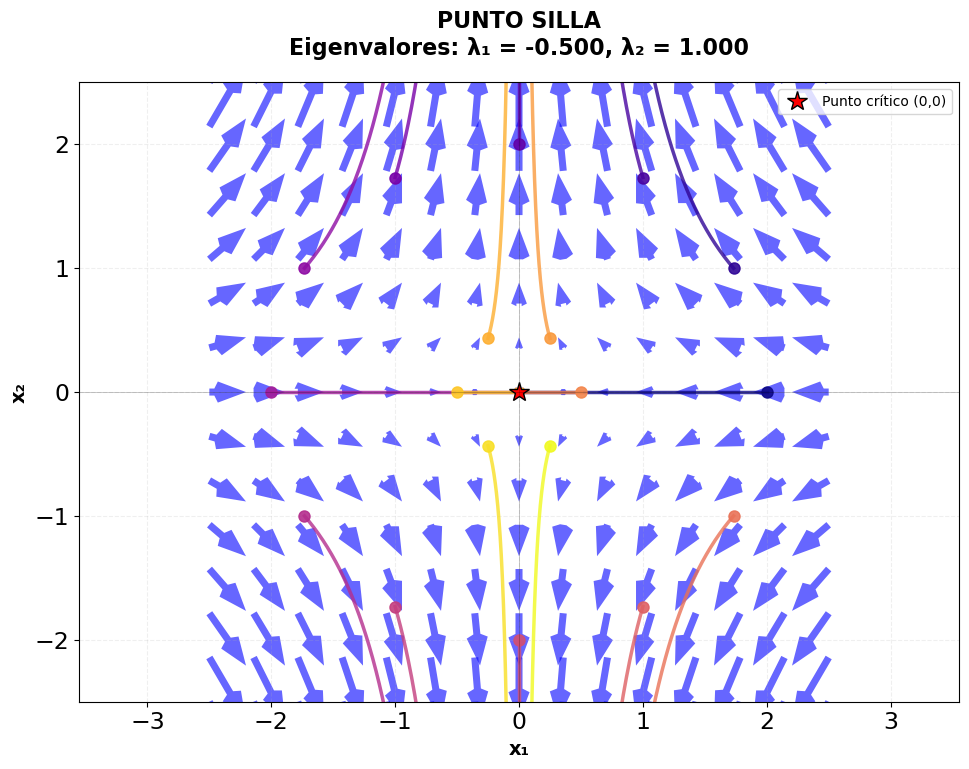


2. NODO ATRACTOR


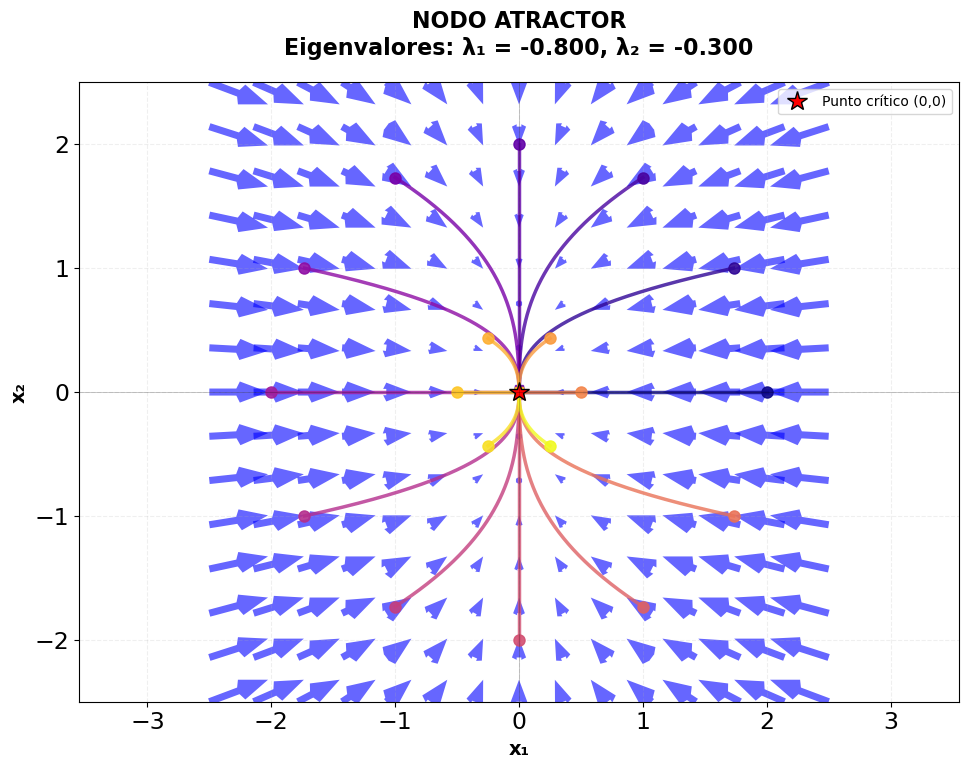


3. NODO REPULSOR


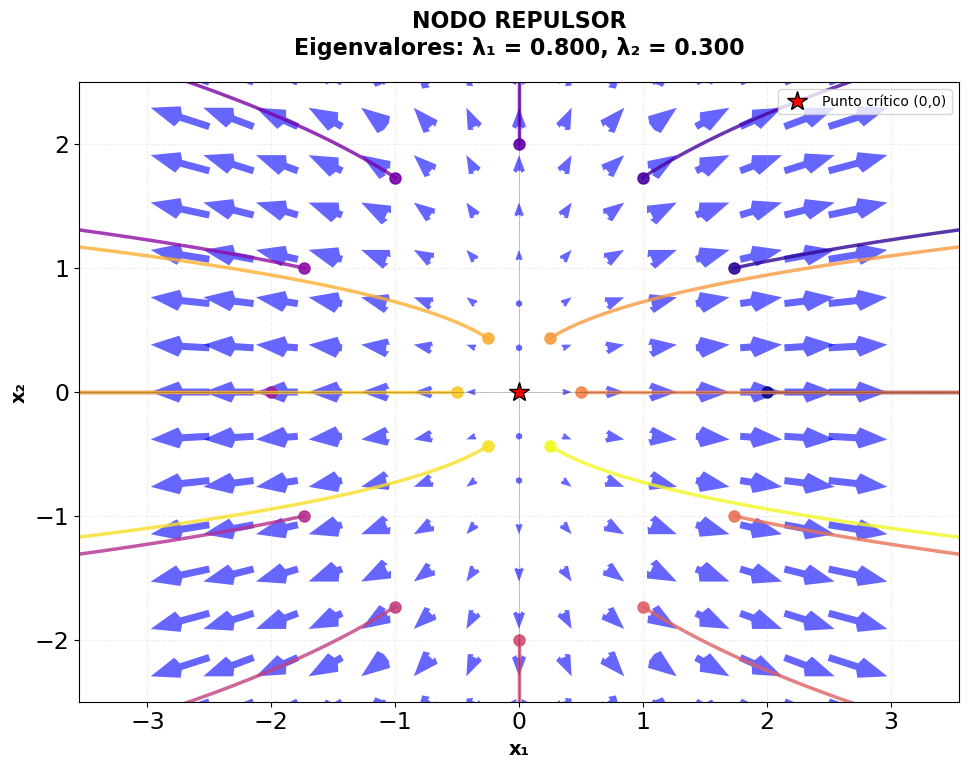


4. FOCO ATRACTOR


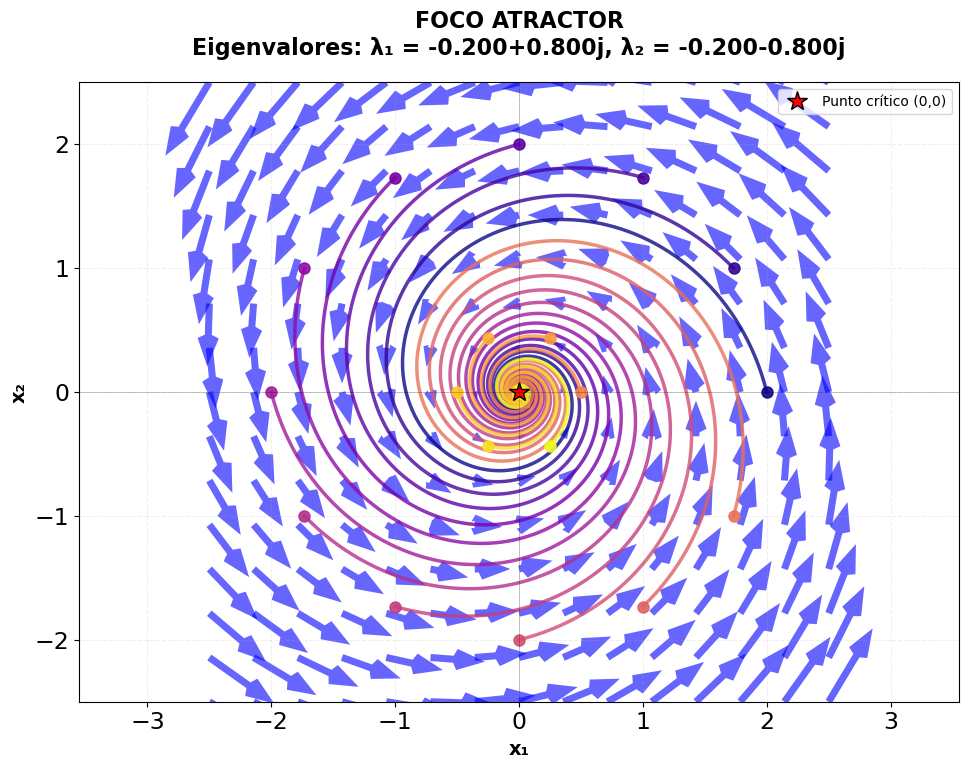


5. FOCO REPULSOR


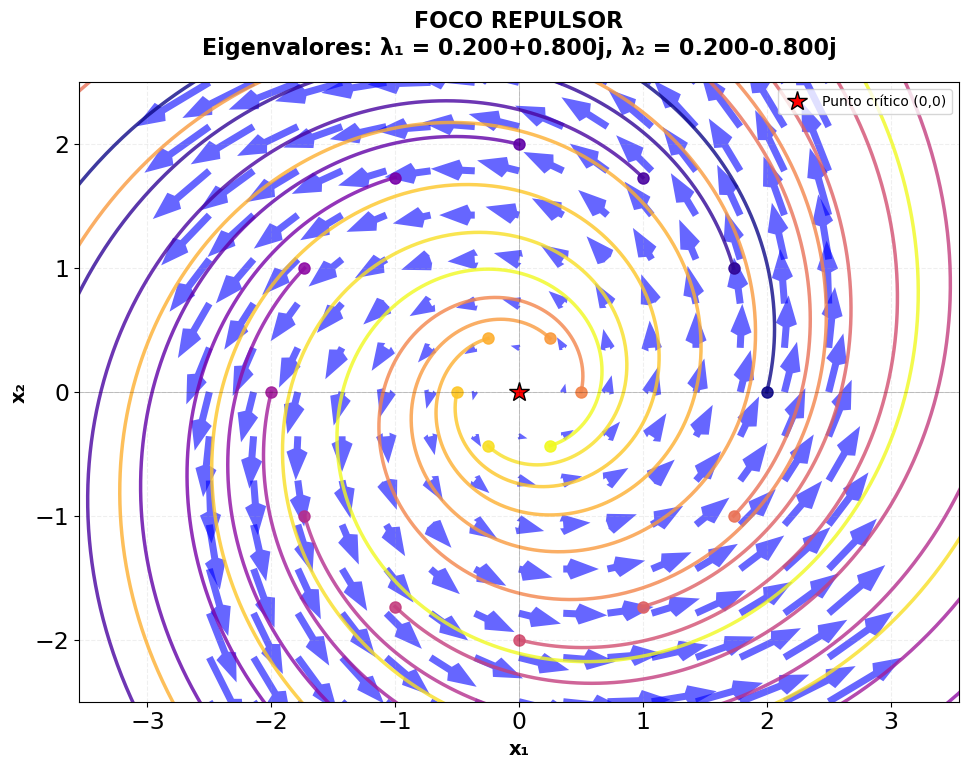


6. CENTRO


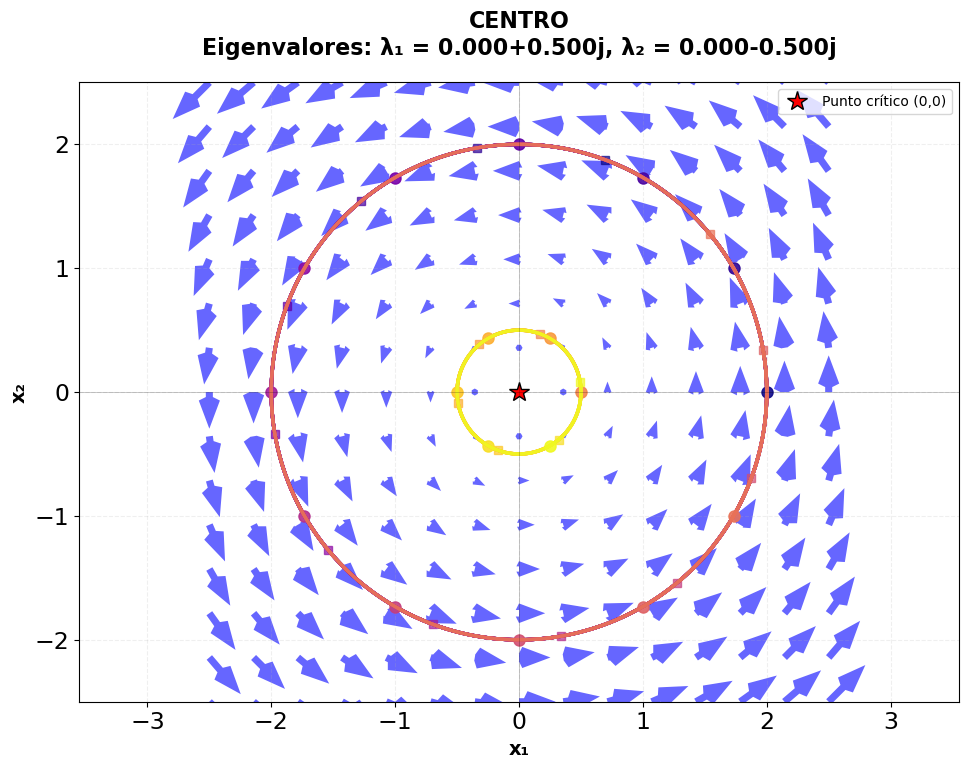


7. NODO DEGENERADO


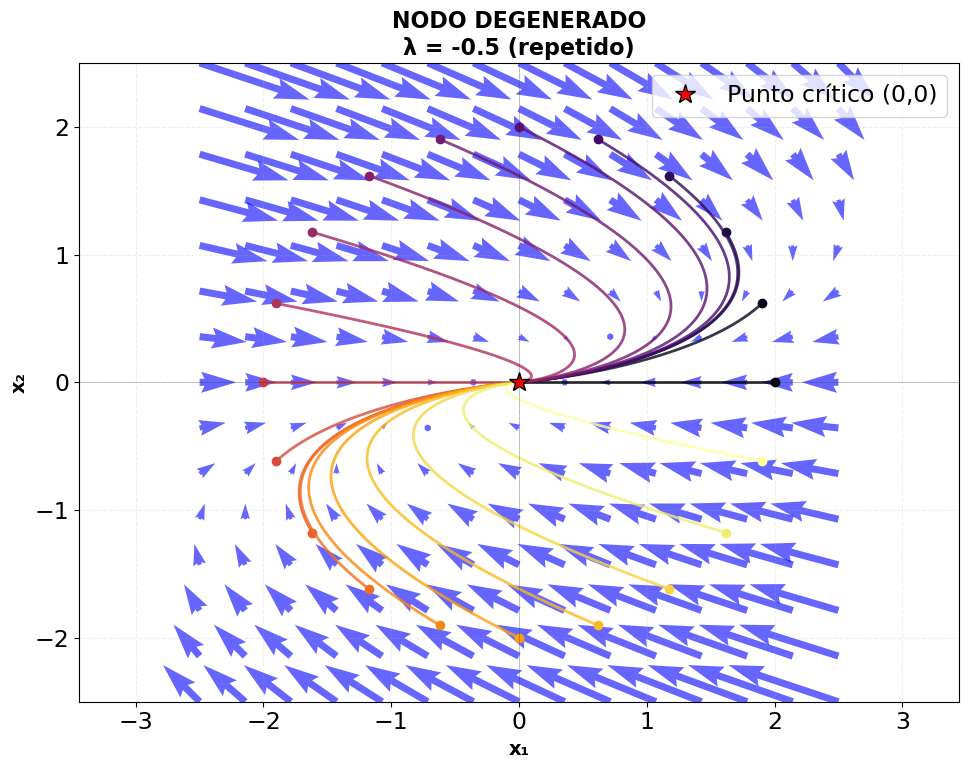


8. NODO DEGENERADO REPULSOR


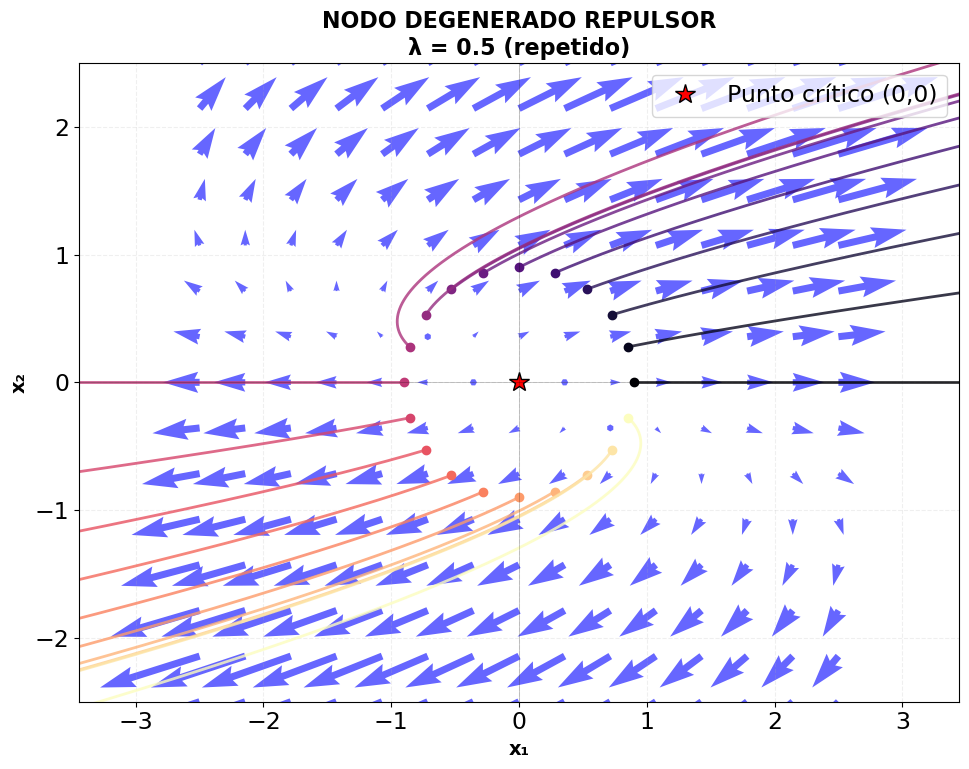


9. VISUALIZACIÓN MÚLTIPLE (4 CASOS)


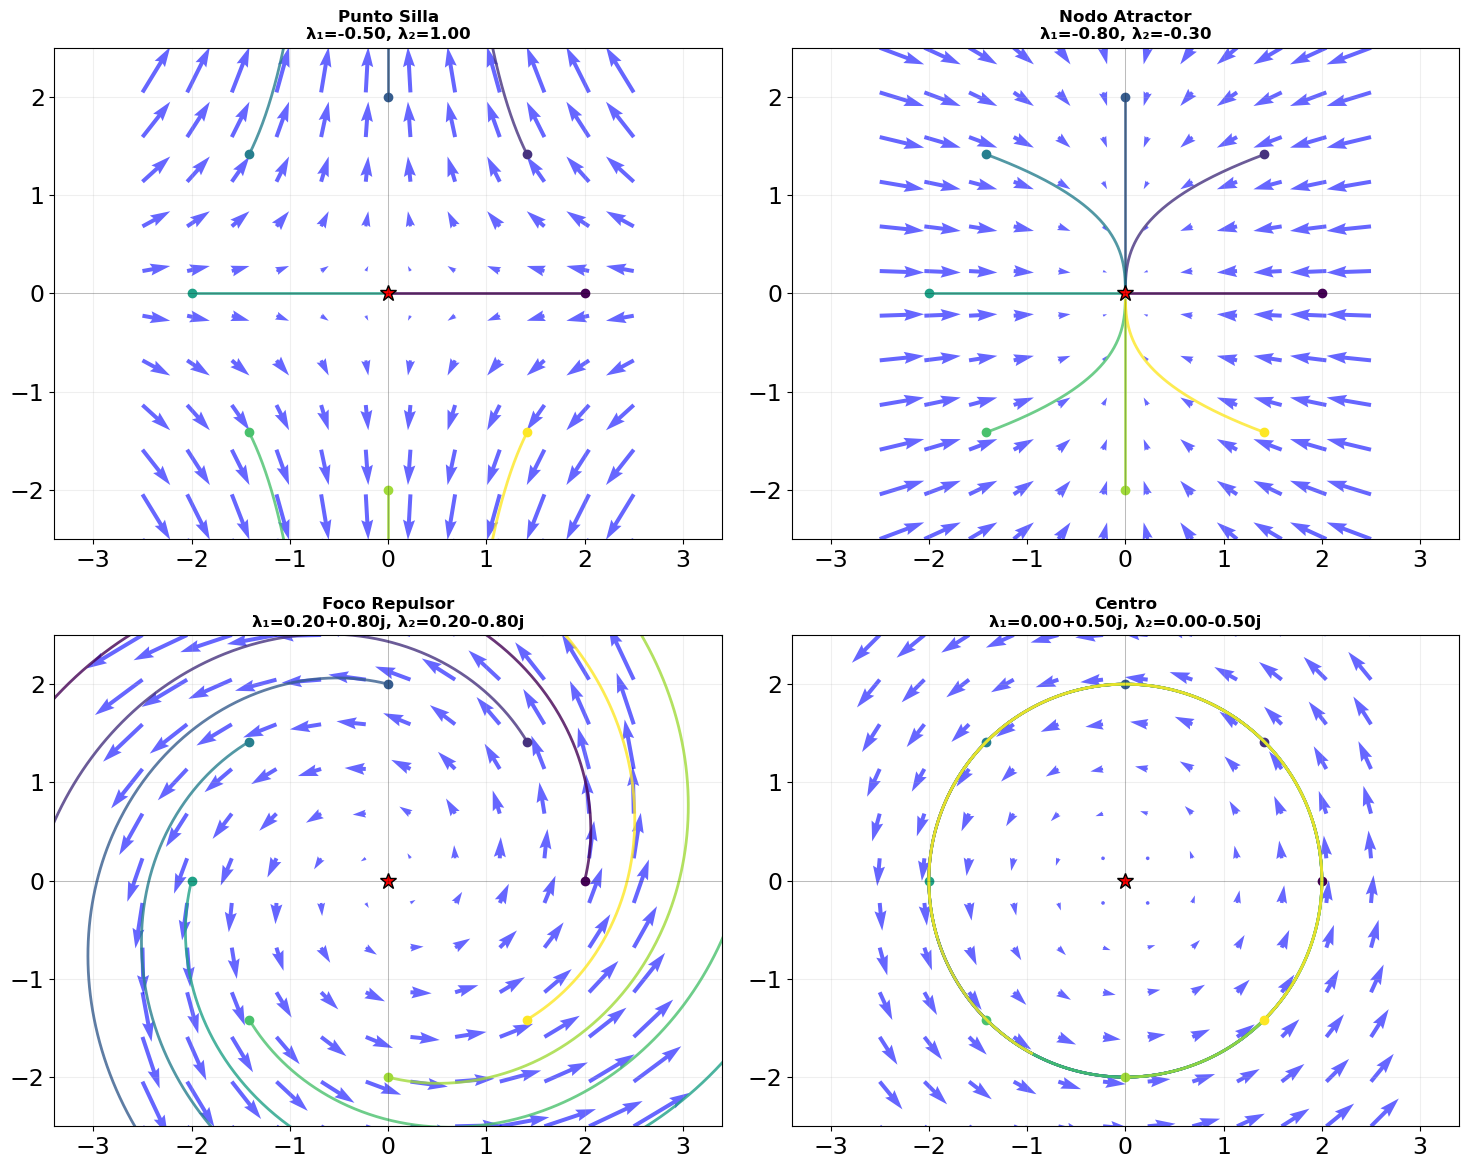

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib import cm

# =============================================================================
# 1. FUNCIONES BÁSICAS
# =============================================================================

def sistema_lineal_2d(x, t, A):
    """Sistema lineal dx/dt = A*x"""
    return A @ x

def generar_campo_vectorial(A, x_lim=3, y_lim=3, n_puntos=20):
    """Genera campo vectorial para el sistema"""
    x = np.linspace(-x_lim, x_lim, n_puntos)
    y = np.linspace(-y_lim, y_lim, n_puntos)
    X, Y = np.meshgrid(x, y)
    
    U = np.zeros_like(X)
    V = np.zeros_like(Y)
    
    for i in range(len(x)):
        for j in range(len(y)):
            dxdt = A @ np.array([X[j,i], Y[j,i]])
            U[j,i] = dxdt[0]
            V[j,i] = dxdt[1]
    
    return X, Y, U, V

def generar_trayectorias(A, condiciones_iniciales, t_max=10, n_puntos=1000):
    """Genera trayectorias para diferentes condiciones iniciales"""
    t = np.linspace(0, t_max, n_puntos)
    trayectorias = []
    
    for x0 in condiciones_iniciales:
        solucion = odeint(sistema_lineal_2d, x0, t, args=(A,))
        trayectorias.append(solucion)
    
    return t, trayectorias

# =============================================================================
# 2. VISUALIZACIÓN ESTILO FIGURA 5.2.6
# =============================================================================

def visualizar_campo_vectorial_simple(eigenvalores, titulo, condiciones_iniciales=None):
    """
    Visualización simple y elegante de campo vectorial con trayectorias
    Similar a la figura 5.2.6
    """
    # Crear matriz del sistema
    if all(isinstance(λ, complex) for λ in eigenvalores):
        alpha = eigenvalores[0].real
        beta = eigenvalores[0].imag
        A = np.array([[alpha, -beta], [beta, alpha]])
    else:
        A = np.diag(eigenvalores)
    
    # Generar condiciones iniciales si no se proporcionan
    if condiciones_iniciales is None:
        # Crear puntos en un círculo alrededor del origen
        n_trayectorias = 12
        radio = 2.0
        angulos = np.linspace(0, 2*np.pi, n_trayectorias, endpoint=False)
        condiciones_iniciales = []
        
        for θ in angulos:
            x0 = radio * np.array([np.cos(θ), np.sin(θ)])
            condiciones_iniciales.append(x0)
        
        # Añadir puntos más cercanos al origen
        for θ in angulos[::2]:
            x0 = 0.5 * np.array([np.cos(θ), np.sin(θ)])
            condiciones_iniciales.append(x0)
    
    # Generar campo vectorial
    X, Y, U, V = generar_campo_vectorial(A, x_lim=2.5, y_lim=2.5, n_puntos=15)
    
    # Generar trayectorias
    t, trayectorias = generar_trayectorias(A, condiciones_iniciales, t_max=15)
    
    # Crear figura
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # ========== CAMPO VECTORIAL ==========
    # Usar quiver para vectores (estilo clásico)
    Q = ax.quiver(X, Y, U, V, 
                 color='blue', 
                 alpha=0.6, 
                 scale=30, 
                 width=0.008,
                 headwidth=3, 
                 headlength=4)
    
    # ========== TRAYECTORIAS ==========
    # Colores para las trayectorias
    colors = cm.plasma(np.linspace(0, 1, len(trayectorias)))
    
    for i, trayectoria in enumerate(trayectorias):
        # Trayectoria principal
        ax.plot(trayectoria[:, 0], trayectoria[:, 1], 
               color=colors[i], 
               linewidth=2.5, 
               alpha=0.8)
        
        # Punto inicial (más grande)
        ax.plot(trayectoria[0, 0], trayectoria[0, 1], 
               'o', 
               color=colors[i], 
               markersize=8,
               alpha=0.9)
        
        # Punto final (indicador de dirección)
        ax.plot(trayectoria[-1, 0], trayectoria[-1, 1], 
               's', 
               color=colors[i], 
               markersize=6,
               alpha=0.7)
    
    # ========== PUNTO CRÍTICO ==========
    ax.plot(0, 0, 
           '*', 
           color='red', 
           markersize=15,
           markeredgecolor='black',
           markeredgewidth=1,
           label='Punto crítico (0,0)')
    
    # ========== CONFIGURACIÓN ESTÉTICA ==========
    ax.set_xlabel('x₁', fontsize=14, fontweight='bold')
    ax.set_ylabel('x₂', fontsize=14, fontweight='bold')
    ax.set_title(f'{titulo}\nEigenvalores: λ₁ = {eigenvalores[0]:.3f}, λ₂ = {eigenvalores[1]:.3f}', 
                fontsize=16, fontweight='bold', pad=20)
    
    # Cuadrícula sutil
    ax.grid(True, alpha=0.2, linestyle='--')
    
    # Ejes iguales y límites
    ax.axis('equal')
    ax.set_xlim(-2.5, 2.5)
    ax.set_ylim(-2.5, 2.5)
    
    # Líneas de ejes
    ax.axhline(y=0, color='black', alpha=0.3, linewidth=0.5)
    ax.axvline(x=0, color='black', alpha=0.3, linewidth=0.5)
    
    # Leyenda
    ax.legend(loc='upper right', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    return fig, A

# =============================================================================
# 3. VISUALIZACIÓN MÚLTIPLE (4 EN 1)
# =============================================================================

def visualizar_cuatro_casos():
    """Visualiza 4 casos diferentes en una sola figura"""
    casos = [
        ([-0.5, 1.0], "Punto Silla"),
        ([-0.8, -0.3], "Nodo Atractor"),
        ([0.2 + 0.8j, 0.2 - 0.8j], "Foco Repulsor"),
        ([0.0 + 0.5j, 0.0 - 0.5j], "Centro")
    ]
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()
    
    for idx, (eigenvalores, titulo) in enumerate(casos):
        ax = axes[idx]
        
        # Crear matriz del sistema
        if all(isinstance(λ, complex) for λ in eigenvalores):
            alpha = eigenvalores[0].real
            beta = eigenvalores[0].imag
            A = np.array([[alpha, -beta], [beta, alpha]])
        else:
            A = np.diag(eigenvalores)
        
        # Generar condiciones iniciales
        n_trayectorias = 8
        angulos = np.linspace(0, 2*np.pi, n_trayectorias, endpoint=False)
        condiciones_iniciales = [2.0 * np.array([np.cos(θ), np.sin(θ)]) for θ in angulos]
        
        # Generar campo vectorial
        X, Y, U, V = generar_campo_vectorial(A, x_lim=2.5, y_lim=2.5, n_puntos=12)
        
        # Generar trayectorias
        t, trayectorias = generar_trayectorias(A, condiciones_iniciales, t_max=10)
        
        # Campo vectorial
        ax.quiver(X, Y, U, V, color='blue', alpha=0.6, scale=30, width=0.006)
        
        # Trayectorias
        colors = cm.viridis(np.linspace(0, 1, len(trayectorias)))
        for i, trayectoria in enumerate(trayectorias):
            ax.plot(trayectoria[:, 0], trayectoria[:, 1], color=colors[i], linewidth=2, alpha=0.8)
            ax.plot(trayectoria[0, 0], trayectoria[0, 1], 'o', color=colors[i], markersize=6)
        
        # Punto crítico
        ax.plot(0, 0, '*', color='red', markersize=12, markeredgecolor='black')
        
        # Configuración
        ax.set_title(f'{titulo}\nλ₁={eigenvalores[0]:.2f}, λ₂={eigenvalores[1]:.2f}', 
                    fontsize=12, fontweight='bold')
        ax.grid(True, alpha=0.2)
        ax.axis('equal')
        ax.set_xlim(-2.5, 2.5)
        ax.set_ylim(-2.5, 2.5)
        ax.axhline(y=0, color='black', alpha=0.3, linewidth=0.5)
        ax.axvline(x=0, color='black', alpha=0.3, linewidth=0.5)
    
    plt.tight_layout()
    plt.show()

# =============================================================================
# 4. EJECUCIÓN PRINCIPAL
# =============================================================================

if __name__ == "__main__":
    print("=== CAMPOS VECTORIALES CON TRAYECTORIAS ===")

    # ========== EJEMPLO 1: PUNTO SILLA ==========
    print("\n1. PUNTO SILLA")
    eigenvalores_silla = [-0.5, 1.0]
    visualizar_campo_vectorial_simple(eigenvalores_silla, "PUNTO SILLA")

    # ========== EJEMPLO 2: NODO ATRACTOR ==========
    print("\n2. NODO ATRACTOR")
    eigenvalores_nodo_atractor = [-0.8, -0.3]
    visualizar_campo_vectorial_simple(eigenvalores_nodo_atractor, "NODO ATRACTOR")

    # ========== EJEMPLO 3: NODO REPULSOR ==========
    print("\n3. NODO REPULSOR")
    eigenvalores_nodo_repulsor = [0.8, 0.3]
    visualizar_campo_vectorial_simple(eigenvalores_nodo_repulsor, "NODO REPULSOR")

    # ========== EJEMPLO 4: FOCO ATRACTOR ==========
    print("\n4. FOCO ATRACTOR")
    eigenvalores_foco_atractor = [-0.2 + 0.8j, -0.2 - 0.8j]
    visualizar_campo_vectorial_simple(eigenvalores_foco_atractor, "FOCO ATRACTOR")

    # ========== EJEMPLO 5: FOCO REPULSOR ==========
    print("\n5. FOCO REPULSOR")
    eigenvalores_foco_repulsor = [0.2 + 0.8j, 0.2 - 0.8j]
    visualizar_campo_vectorial_simple(eigenvalores_foco_repulsor, "FOCO REPULSOR")

    # ========== EJEMPLO 6: CENTRO ==========
    print("\n6. CENTRO")
    eigenvalores_centro = [0.0 + 0.5j, 0.0 - 0.5j]
    visualizar_campo_vectorial_simple(eigenvalores_centro, "CENTRO")

    # ========== EJEMPLO 7: NODO DEGENERADO ==========
    print("\n7. NODO DEGENERADO")

    # Autovalores repetidos λ = -0.5
    lambda_degenerado = -0.5
    # Matriz en forma de Jordan (no diagonalizable)
    A_degenerado = np.array([[lambda_degenerado, 1],
                             [0, lambda_degenerado]])

    # Condiciones iniciales (alrededor del origen)
    n_trayectorias = 20
    radio = 2.0
    angulos = np.linspace(0, 2*np.pi, n_trayectorias, endpoint=False)
    condiciones_iniciales = [radio * np.array([np.cos(θ), np.sin(θ)]) for θ in angulos]

    # Campo vectorial
    X, Y, U, V = generar_campo_vectorial(A_degenerado, x_lim=2.5, y_lim=2.5, n_puntos=15)

    # Trayectorias
    t, trayectorias = generar_trayectorias(A_degenerado, condiciones_iniciales, t_max=15)

    # Gráfica
    fig, ax = plt.subplots(figsize=(10, 8))

    # Campo vectorial
    ax.quiver(X, Y, U, V, color='blue', alpha=0.6, scale=30, width=0.008)

    # Trayectorias
    colors = cm.inferno(np.linspace(0, 1, len(trayectorias)))
    for i, trayectoria in enumerate(trayectorias):
        ax.plot(trayectoria[:, 0], trayectoria[:, 1], 
                color=colors[i], linewidth=2, alpha=0.8)
        ax.plot(trayectoria[0, 0], trayectoria[0, 1], 'o', color=colors[i], markersize=6)

    # Punto crítico
    ax.plot(0, 0, '*', color='red', markersize=15, markeredgecolor='black', label='Punto crítico (0,0)')

    # Configuración
    ax.set_title(f"NODO DEGENERADO\nλ = {lambda_degenerado} (repetido)", fontsize=16, fontweight='bold')
    ax.set_xlabel('x₁', fontsize=14, fontweight='bold')
    ax.set_ylabel('x₂', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.2, linestyle='--')
    ax.axis('equal')
    ax.set_xlim(-2.5, 2.5)
    ax.set_ylim(-2.5, 2.5)
    ax.axhline(y=0, color='black', alpha=0.3, linewidth=0.5)
    ax.axvline(x=0, color='black', alpha=0.3, linewidth=0.5)
    ax.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

    # ========== EJEMPLO 8: NODO DEGENERADO REPULSOR ==========
    print("\n8. NODO DEGENERADO REPULSOR")

    # Autovalores repetidos λ = +0.5
    lambda_degenerado_repulsor = 0.5
    # Matriz en forma de Jordan (no diagonalizable)
    A_degenerado_repulsor = np.array([[lambda_degenerado_repulsor, 1],
                                      [0, lambda_degenerado_repulsor]])

    # Condiciones iniciales (alrededor del origen)
    n_trayectorias = 20
    radio = 0.9
    angulos = np.linspace(0, 2*np.pi, n_trayectorias, endpoint=False)
    condiciones_iniciales = [radio * np.array([np.cos(θ), np.sin(θ)]) for θ in angulos]

    # Campo vectorial
    X, Y, U, V = generar_campo_vectorial(A_degenerado_repulsor, x_lim=2.5, y_lim=2.5, n_puntos=15)

    # Trayectorias
    t, trayectorias = generar_trayectorias(A_degenerado_repulsor, condiciones_iniciales, t_max=15)

    # Gráfica
    fig, ax = plt.subplots(figsize=(10, 8))

    # Campo vectorial
    ax.quiver(X, Y, U, V, color='blue', alpha=0.6, scale=30, width=0.008)

    # Trayectorias
    colors = cm.magma(np.linspace(0, 1, len(trayectorias)))
    for i, trayectoria in enumerate(trayectorias):
        ax.plot(trayectoria[:, 0], trayectoria[:, 1], 
                color=colors[i], linewidth=2, alpha=0.8)
        ax.plot(trayectoria[0, 0], trayectoria[0, 1], 'o', color=colors[i], markersize=6)

    # Punto crítico
    ax.plot(0, 0, '*', color='red', markersize=15, markeredgecolor='black', label='Punto crítico (0,0)')

    # Configuración
    ax.set_title(f"NODO DEGENERADO REPULSOR\nλ = {lambda_degenerado_repulsor} (repetido)", 
                 fontsize=16, fontweight='bold')
    ax.set_xlabel('x₁', fontsize=14, fontweight='bold')
    ax.set_ylabel('x₂', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.2, linestyle='--')
    ax.axis('equal')
    ax.set_xlim(-2.5, 2.5)
    ax.set_ylim(-2.5, 2.5)
    ax.axhline(y=0, color='black', alpha=0.3, linewidth=0.5)
    ax.axvline(x=0, color='black', alpha=0.3, linewidth=0.5)
    ax.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

    # ========== VISUALIZACIÓN MÚLTIPLE ==========
    print("\n9. VISUALIZACIÓN MÚLTIPLE (4 CASOS)")
    visualizar_cuatro_casos()